<a href="https://colab.research.google.com/github/KendallScott/Machine-Learning/blob/main/prophet_yfinance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Install yfinance

In [1]:
!pip install yfinance

# Forecasting Stocks from Yahoo Finance with Prophet

In [2]:
import yfinance as yf

# berkshire hathaway inc. (b stock)
brk = yf.Ticker('BRK-B')

hist = brk.history(period="max", auto_adjust=True)

hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1996-05-09 00:00:00-04:00,22.200001,24.400000,22.200001,23.200001,4290000,0.0,0.0
1996-05-10 00:00:00-04:00,24.000000,24.200001,23.600000,24.000000,1060000,0.0,0.0
1996-05-13 00:00:00-04:00,24.000000,24.100000,23.299999,23.900000,700000,0.0,0.0
1996-05-14 00:00:00-04:00,24.000000,24.100000,23.100000,23.600000,310000,0.0,0.0
1996-05-15 00:00:00-04:00,23.600000,23.700001,23.000000,23.200001,545000,0.0,0.0
...,...,...,...,...,...,...,...
2023-06-30 00:00:00-04:00,338.779999,342.500000,338.399994,341.000000,4520600,0.0,0.0
2023-07-03 00:00:00-04:00,340.750000,342.079987,338.410004,342.000000,2047400,0.0,0.0
2023-07-05 00:00:00-04:00,340.049988,341.890015,338.700012,341.559998,2870700,0.0,0.0


In [3]:
import pandas as pd

df = pd.DataFrame()

df['ds'] = hist.index
df['y'] = hist['Close'].values

df.tail()

,ds,y
6831,2023-06-30 00:00:00-04:00,341.000000
6832,2023-07-03 00:00:00-04:00,342.000000
6833,2023-07-05 00:00:00-04:00,341.559998
6834,2023-07-06 00:00:00-04:00,341.459991
6835,2023-07-07 00:00:00-04:00,340.899994


In [10]:
pip install pystan==2.19.1.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 58.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pystan
  Running setup.py clean for pystan
Failed to build pystan
ERROR: Could not build wheels for pystan, which is required to install pyproject.toml-based projects


In [17]:
pip install prophet

In [19]:
from prophet import Prophet

In [22]:
df

#remove timezone?
df['ds'] = df['ds'].dt.tz_localize(None)

df


,ds,y
0,1996-05-09,23.200001
1,1996-05-10,24.000000
2,1996-05-13,23.900000
3,1996-05-14,23.600000
4,1996-05-15,23.200001
...,...,...
6831,2023-06-30,341.000000
6832,2023-07-03,342.000000
6833,2023-07-05,341.559998
6834,2023-07-06,341.459991


In [23]:
m = Prophet(daily_seasonality=False)

m.fit(df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mp0kw9e/4v169kwe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mp0kw9e/1b4z3oln.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13522', 'data', 'file=/tmp/tmp_mp0kw9e/4v169kwe.json', 'init=/tmp/tmp_mp0kw9e/1b4z3oln.json', 'output', 'file=/tmp/tmp_mp0kw9e/prophet_modelrrdgj3v6/prophet_model-20230709184634.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:46:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:46:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [24]:
future = m.make_future_dataframe(365, freq='D')

forecast = m.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
7194,2024-06-30,342.851196,326.737704,359.581369
7195,2024-07-01,340.183695,323.632728,356.183044
7196,2024-07-02,340.330769,324.852464,357.490050
7197,2024-07-03,340.420470,323.094229,356.992264
7198,2024-07-04,340.450980,324.654618,355.818819
7199,2024-07-05,340.680825,324.859845,357.336491
7200,2024-07-06,343.231088,326.463843,359.498607


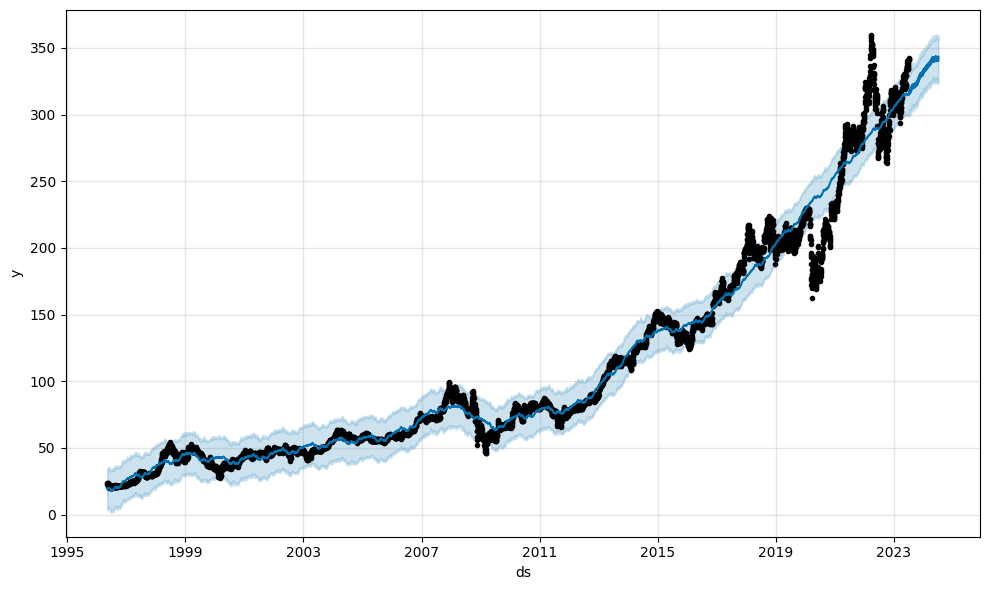

In [25]:
m.plot(forecast);

## Make it a Function

In [26]:
def make_forecast(ticker, periods, hist='max'):
    """
    forecast the given ticker (stock) period days into the future (from today)

    inputs
    ------
    > ticker
        >> ticker of stock to forecast
    > periods
        >> number of days into the future to forecast (from today's date)
    > hist
        >> amount of historical data to consider
            > default: max
            > options: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
    """
    # pull historical data from yahoo finance
    stock_data = yf.Ticker(ticker)

    hist_data = stock_data.history(hist, auto_adjust=True)

    # create new dataframe to hold dates (ds) & adjusted closing prices (y)
    df = pd.DataFrame()

    df['ds'] = hist_data.index.values
    df['y'] = hist_data['Close'].values

    # create a Prophet model from that data
    m = Prophet(daily_seasonality=False)
    m.fit(df)

    future = m.make_future_dataframe(periods, freq='D')

    forecast = m.predict(future)

    m.plot(forecast)

    return forecast

#### Make some Forecasts with that Function

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mp0kw9e/nde0b6um.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mp0kw9e/y4b7i_50.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99125', 'data', 'file=/tmp/tmp_mp0kw9e/nde0b6um.json', 'init=/tmp/tmp_mp0kw9e/y4b7i_50.json', 'output', 'file=/tmp/tmp_mp0kw9e/prophet_modelte51m3o3/prophet_model-20230709184700.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:47:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:47:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-05-05 04:00:00,11.872515,10.392183,12.217319,11.872515,11.872515,-0.582462,-0.582462,-0.582462,0.070936,0.070936,0.070936,-0.653398,-0.653398,-0.653398,0.0,0.0,0.0,11.290053
1,2017-05-08 04:00:00,11.865892,10.473479,12.234480,11.865892,11.865892,-0.518056,-0.518056,-0.518056,0.080367,0.080367,0.080367,-0.598423,-0.598423,-0.598423,0.0,0.0,0.0,11.347836
2,2017-05-09 04:00:00,11.863684,10.476769,12.311261,11.863684,11.863684,-0.499888,-0.499888,-0.499888,0.073283,0.073283,0.073283,-0.573171,-0.573171,-0.573171,0.0,0.0,0.0,11.363796
3,2017-05-10 04:00:00,11.861476,10.521534,12.270519,11.861476,11.861476,-0.472064,-0.472064,-0.472064,0.072987,0.072987,0.072987,-0.545051,-0.545051,-0.545051,0.0,0.0,0.0,11.389412
4,2017-05-11 04:00:00,11.859268,10.479856,12.278418,11.859268,11.859268,-0.457014,-0.457014,-0.457014,0.057470,0.057470,0.057470,-0.514484,-0.514484,-0.514484,0.0,0.0,0.0,11.402254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1728,2023-12-30 04:00:00,8.032550,6.317570,8.742969,7.309427,8.843833,-0.488679,-0.488679,-0.488679,-0.386135,-0.386135,-0.386135,-0.102545,-0.102545,-0.102545,0.0,0.0,0.0,7.543871
1729,2023-12-31 04:00:00,8.017126,6.803556,9.202813,7.287409,8.833334,-0.052425,-0.052425,-0.052425,0.031091,0.031091,0.031091,-0.083516,-0.083516,-0.083516,0.0,0.0,0.0,7.964701
1730,2024-01-01 04:00:00,8.001702,6.883785,9.329481,7.264732,8.829441,0.018969,0.018969,0.018969,0.080367,0.080367,0.080367,-0.061398,-0.061398,-0.061398,0.0,0.0,0.0,8.020671
1731,2024-01-02 04:00:00,7.986278,6.853998,9.187418,7.243326,8.825951,0.036845,0.036845,0.036845,0.073283,0.073283,0.073283,-0.036438,-0.036438,-0.036438,0.0,0.0,0.0,8.023123


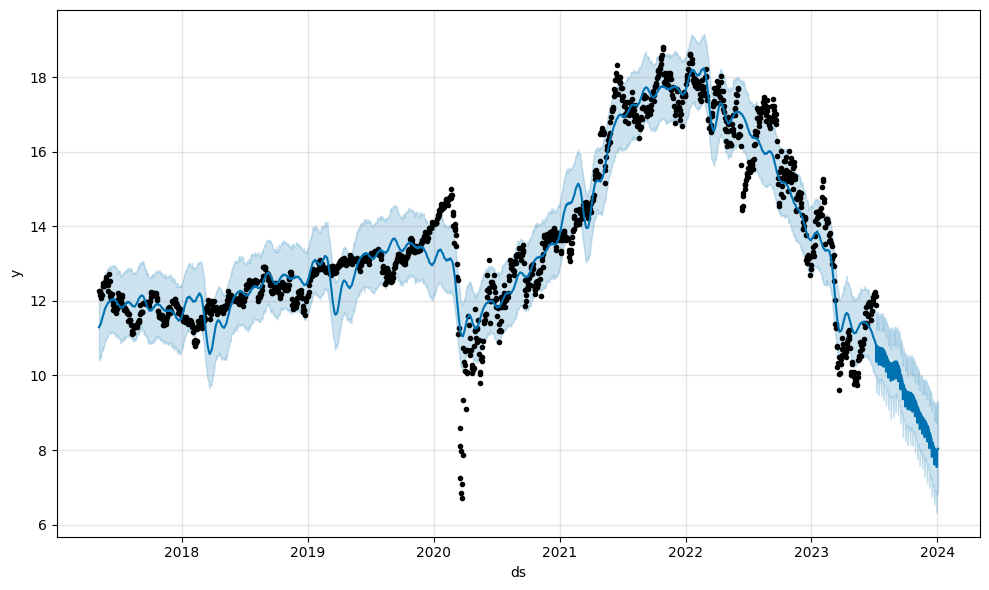

In [27]:
# kkr real estate finance trust
make_forecast('KREF', 180)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mp0kw9e/sghudgyj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mp0kw9e/iq42r4yh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34572', 'data', 'file=/tmp/tmp_mp0kw9e/sghudgyj.json', 'init=/tmp/tmp_mp0kw9e/iq42r4yh.json', 'output', 'file=/tmp/tmp_mp0kw9e/prophet_modell72n29tx/prophet_model-20230709184708.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:47:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:47:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2924,2025-07-02 04:00:00,36.369339,-13.410079,80.567342,-11.094986,81.969780,-1.420374,-1.420374,-1.420374,-1.098702,-1.098702,-1.098702,-0.321672,-0.321672,-0.321672,0.0,0.0,0.0,34.948966
2925,2025-07-03 04:00:00,36.366541,-14.036132,80.525605,-11.127180,82.069575,-1.445472,-1.445472,-1.445472,-1.012892,-1.012892,-1.012892,-0.432580,-0.432580,-0.432580,0.0,0.0,0.0,34.921069
2926,2025-07-04 04:00:00,36.363743,-15.391190,80.249883,-11.301880,82.169257,-1.571714,-1.571714,-1.571714,-1.045867,-1.045867,-1.045867,-0.525847,-0.525847,-0.525847,0.0,0.0,0.0,34.792029
2927,2025-07-05 04:00:00,36.360945,-10.868460,84.076498,-11.397170,82.274148,2.028431,2.028431,2.028431,2.629844,2.629844,2.629844,-0.601413,-0.601413,-0.601413,0.0,0.0,0.0,38.389376
2928,2025-07-06 04:00:00,36.358147,-12.013807,84.781244,-11.492419,82.384223,2.113513,2.113513,2.113513,2.773221,2.773221,2.773221,-0.659708,-0.659708,-0.659708,0.0,0.0,0.0,38.471660


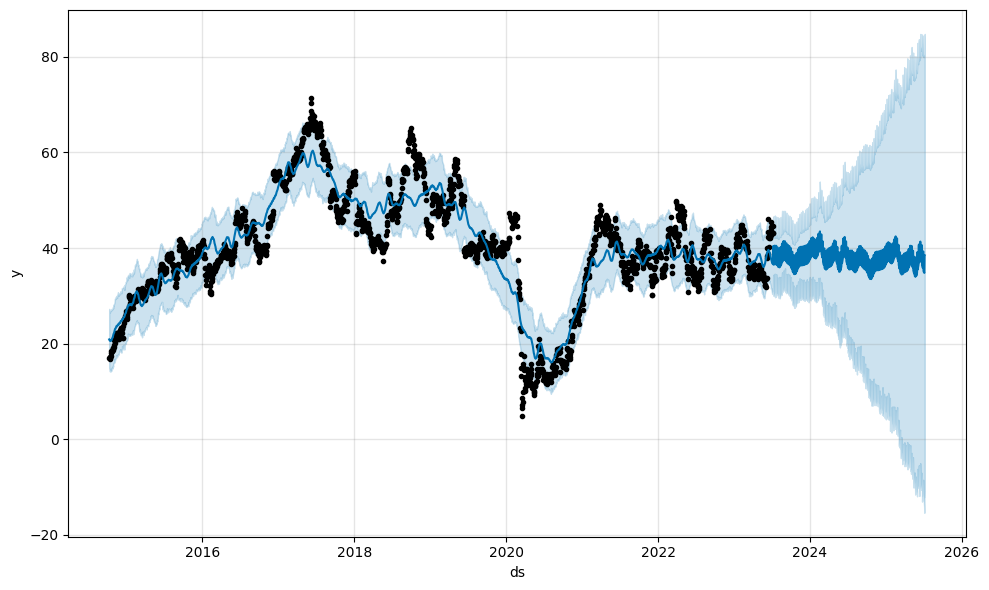

In [28]:
# dave & buster's
make_forecast('PLAY', 365 * 2).tail()

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mp0kw9e/i4cs0td8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_mp0kw9e/uiot16_h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76662', 'data', 'file=/tmp/tmp_mp0kw9e/i4cs0td8.json', 'init=/tmp/tmp_mp0kw9e/uiot16_h.json', 'output', 'file=/tmp/tmp_mp0kw9e/prophet_model4czhw4y6/prophet_model-20230709184713.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:47:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:47:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
1598,2023-07-08 04:00:00,4.874524,-0.618938,9.946568
1599,2023-07-09 04:00:00,4.040359,-0.821709,9.073325
1600,2023-07-10 04:00:00,3.555565,-1.111332,8.478901
1601,2023-07-11 04:00:00,3.356785,-1.864116,8.399968
1602,2023-07-12 04:00:00,3.204385,-1.770646,8.351750
...,...,...,...,...
1958,2024-07-02 04:00:00,-10.543039,-35.183849,15.785407
1959,2024-07-03 04:00:00,-10.644124,-36.262765,15.031958
1960,2024-07-04 04:00:00,-10.737125,-36.728336,16.067357
1961,2024-07-05 04:00:00,-10.772148,-35.489214,15.696878


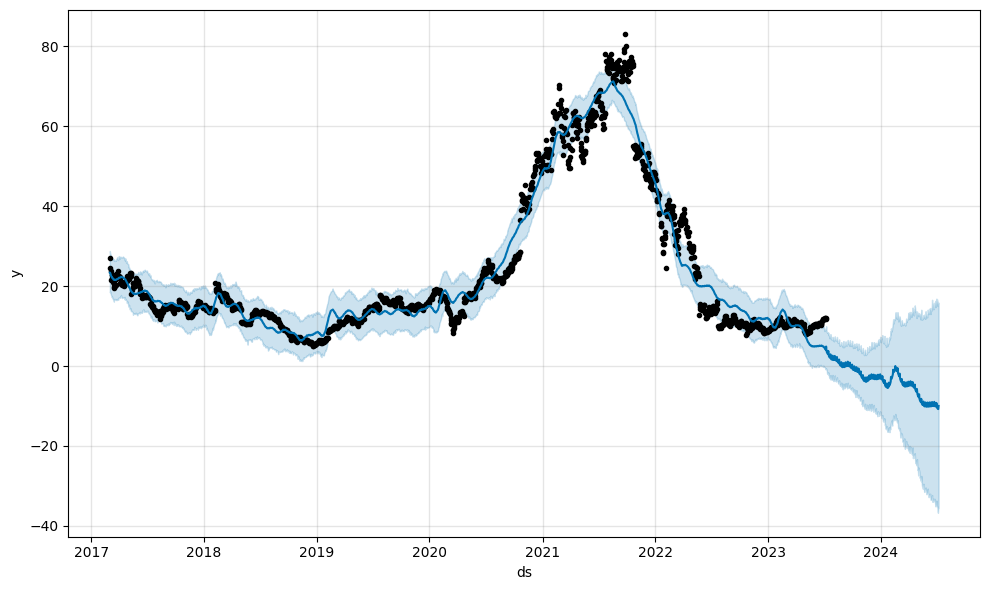

In [29]:
n = 365  # set variable for number of days to predict

# snapchat
snap_forecast = make_forecast('SNAP', n)

# only keep the future forecast, and forget most columns
snap_forecast = snap_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(n)

snap_forecast